In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

import torch
from IPython.display import Image, clear_output

clear_output()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/license_plates/plates_v5.zip -d ../
clear_output()

In [ ]:
!pip install -q wandb
import wandb
wandb.login()

     |████████████████████████████████| 1.9 MB 14.6 MB/s 
     |████████████████████████████████| 182 kB 65.4 MB/s 
     |████████████████████████████████| 162 kB 68.3 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 162 kB 50.4 MB/s 
     |████████████████████████████████| 158 kB 63.5 MB/s 
     |████████████████████████████████| 157 kB 65.3 MB/s 
     |████████████████████████████████| 157 kB 56.0 MB/s 
     |████████████████████████████████| 157 kB 53.3 MB/s 
     |████████████████████████████████| 157 kB 50.8 MB/s 
     |████████████████████████████████| 157 kB 82.9 MB/s 
     |████████████████████████████████| 157 kB 50.1 MB/s 
     |████████████████████████████████| 157 kB 56.4 MB/s 
     |████████████████████████████████| 156 kB 59.1 MB/s 


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# Обучение Yolov5

In [ ]:
!python train.py --img 640 --batch 64 --epochs 50 --data /content/drive/MyDrive/license_plates/custom.yaml --weights yolov5x.pt --cache

wandb: Currently logged in as: tagirov. Use `wandb login --relogin` to force relogin
train: weights=yolov5m.pt, cfg=, data=/content/drive/MyDrive/license_plates/custom.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/ultralytics/yolov5
   0624e71..d7e9b64  exp8       -> origin/exp8
github: up to date wi

# Тестирование

In [ ]:
# Yolov5s
!python val.py --weights /content/yolov5/runs/train/exp2/weights/best.pt --data /content/drive/MyDrive/license_plates/custom.yaml

val: data=/content/drive/MyDrive/license_plates/custom.yaml, weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-187-g5ef69ef Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '/content/plates_v4/labels/val.cache' images and labels... 72 found, 0 missing, 0 empty, 0 corrupt: 100% 72/72 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:03<00:00,  1.25s/it]
                   all         72        108      0.766      0.638      0.703      0.317
Speed: 0.1ms pre-process, 7.1ms inference, 2.5ms NMS per im

In [ ]:
# Yolov5m
!python val.py --weights /content/yolov5/runs/train/exp4/weights/best.pt --data /content/drive/MyDrive/license_plates/custom.yaml

val: data=/content/drive/MyDrive/license_plates/custom.yaml, weights=['/content/yolov5/runs/train/exp4/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-187-g5ef69ef Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning '/content/plates_v4/labels/val.cache' images and labels... 72 found, 0 missing, 0 empty, 0 corrupt: 100% 72/72 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:04<00:00,  1.46s/it]
                   all         72        108      0.786      0.681      0.742       0.37
Speed: 0.2ms pre-process, 10.9ms inference, 2.4ms NMS per 

In [ ]:
# Yolov5x
!python val.py --weights /content/yolov5/runs/train/exp3/weights/best.pt --data /content/drive/MyDrive/license_plates/custom.yaml

val: data=/content/drive/MyDrive/license_plates/custom.yaml, weights=['/content/yolov5/runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-187-g5ef69ef Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 322 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs
val: Scanning '/content/plates_v4/labels/val.cache' images and labels... 72 found, 0 missing, 0 empty, 0 corrupt: 100% 72/72 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:05<00:00,  1.88s/it]
                   all         72        108      0.825      0.785      0.832      0.424
Speed: 1.9ms pre-process, 33.4ms inference, 2.2ms NMS per

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp2/weights/best.pt --img 640 --conf 0.5 --source /content/test

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --source /content/drive/MyDrive/license_plates/ru2.mp4

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/license_plates/ru2.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-181-g8a19437 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 322 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs
video 1/1 (1/380) /content/drive/MyDrive/license_plates/ru2.mp4: 384x640 1 plate, 61.6ms
video 1/1 (2/380) /content/drive/MyDrive/license_plates/ru2.mp4: 384x640 1 plate, 61.2ms
video 1/1 (3/380) /content/drive/MyDrive/license_plates/ru2.mp4: 384x640 1 plate, 40.3ms
video 1/1 (4/380) /content/drive/My

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):
    display(Image(filename=imageName))
    print("\n")

# Распознование текста

In [ ]:
!pip install easyocr
import easyocr

In [ ]:
import re
import cv2
import torch
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
model = torch.hub.load('/content/yolov5','custom', path='/content/yolov5/runs/train/exp/weights/best.pt', force_reload=True, source='local')

YOLOv5 🚀 v6.2-181-g8a19437 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 322 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs
Adding AutoShape... 


In [ ]:
reader = easyocr.Reader(['ru'])

def extract_number(img_filename, model, reader):
    image = cv2.imread(img_filename)    
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    result = model(img_gray)
    cordinates = result.xyxyn[0][:, :-1]
    width, height = image.shape[1], image.shape[0]

    for row in cordinates:
        x1, y1, x2, y2 = int(row[0]*width), int(row[1]*height), int(row[2]*width), int(row[3]*height)    
        read = reader.readtext(img_gray[y1:y2, x1:x2])
        print(read[0][-2].upper().replace(';', ''))

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.rectangle(image, (x1, y1-28),  (x2, y1), (51, 51, 255) , -1)
        cv2.putText(image, ' ' + read[0][-2].upper().replace(';', ''), (x1, y1 - 10), cv2.FONT_HERSHEY_COMPLEX, 0.55, (255, 255, 255), 2)

    cv2_imshow(image)

К9800У196
КВ 654 66


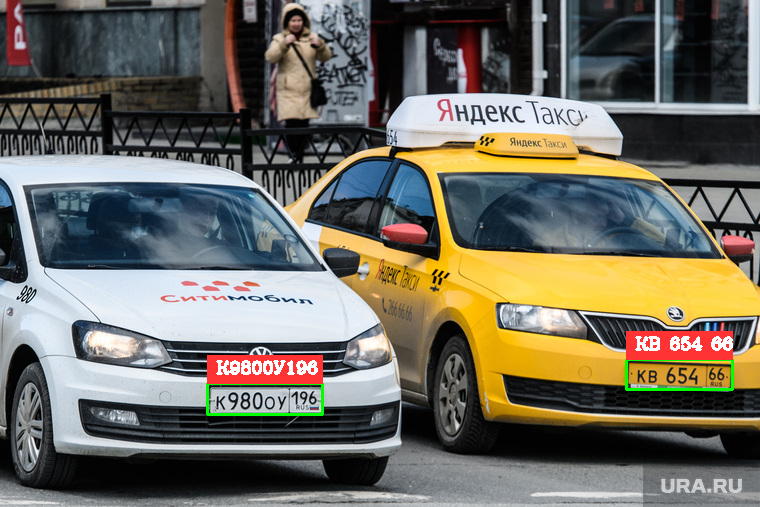

In [ ]:
extract_number('/content/test/32.jpg', model, reader)

In [ ]:
def video(video_path, model, reader):
    capture = cv2.VideoCapture(video_path)

    while capture.isOpened():
        ret, image = capture.read()
        img = image.copy()
        if image is None:
            break
        result = model(image)
        cordinates = result.xyxyn[0][:, :-1]
        if cordinates.shape[0] == 0:
            continue

        width, height = image.shape[1], image.shape[0]

        for row in cordinates:
            x1, y1, x2, y2 = (int(row[0] * width), int(row[1] * height),
                              int(row[2] * width), int(row[3] * height))

            img_gray = cv2.cvtColor(image[y1:y2, x1:x2], cv2.COLOR_BGR2GRAY)
            read = reader.readtext(img_gray)

            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.rectangle(img, (x1, y1 - 28), (x2, y1), (51, 51, 255), -1)
            if read:
                plate = ''.join(re.findall(r'[А-Я-0-9]', read[0][-2].upper()))
                cv2.putText(img, ' ' + plate, (x1, y1 - 10), cv2.FONT_HERSHEY_COMPLEX,
                            0.55, (255, 255, 255), 2)

        cv2.imshow('video', img)
        if cv2.waitKey(5) & 0xFF == ord('q'):
            break

    cv2.destroyAllWindows()

In [ ]:
video('/content/drive/MyDrive/license_plates/ru.mp4', model, reader)